In [ ]:
import pandas as pd
import re
import string
from google.colab import drive

In [24]:
!pip -q install pandas openpyxl xlsxwriter

In [25]:
drive.mount('/content/drive')

# Define the path to your Excel file.
DATA_PATH = "/content/drive/MyDrive/BurmeseMusic_MMDT/labelled_genre_20th_23rd_Aug_music_cleaned_split.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_excel(DATA_PATH)
df.columns = [str(c).strip() for c in df.columns]
print("Columns:", list(df.columns))
df.head(10)

Columns: ['Genre', 'song_title', 'lyric_text', 'song_writer1', 'song_writer2', 'song_writer3', 'artist1', 'artist2', 'artist3', 'artist4', 'artist5', 'artist6']


,Genre,song_title,lyric_text,song_writer1,song_writer2,song_writer3,artist1,artist2,artist3,artist4,artist5,artist6
0,Pop,တစ်ခါတလေ,ငွေတွေပြန်ပေးလိုက်ချင်တယ် မလိုချင်ဘူး\nငါ့သိက္...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
1,Pop,အခန့်သင့်,သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ်\nလူဆိုတော့ ကေ...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
2,Pop,နောက်ဆုံးသီချင်း,နင်ဟာသီချင်းလေးတစ်ပုဒ်ပေါ့ ငါ့ရဲ့နှလုံးသားထဲမှ...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
3,Pop,ကိုယ့်ရင်ဆီ,မှားယွင်းခဲ့တဲ့အတိတ်နေ့များကို\nမင်းလေးကျောခို...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
4,Pop,ခံစားခွင့်,မှားယွင်းပြီးကိုးကွယ် အချစ်တရားကို အရာရာမှာ\nင...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
5,Pop,အေးစက်သောညများ,အေးစက်တဲ့ကိုယ့်ညတွေဆွေး ဘေးနားက အနွေးဓာတ်လေး\n...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
6,Pop,လှေကားထစ်လေးများ,မင်းနင်းဖြတ်လျှောက်သွား လှေကားထစ်လေးများလို\nမ...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
7,Pop,မျက်နှာများ,ဘယ်သူ့ကိုပိုချစ်မှာလဲ ဘယ်သူ့ကိုရွေးချယ်မလဲ\nအသ...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,unknown,unknown,unknown
8,Pop,ရုပ်သေးရုပ်,နှလုံးသားနဲ့အသက်ရှင်ခဲ့ စွန့်လွှတ်ဖို့/အရှုံးပ...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စည်သူလွင်,အဲလက်စ်,ချောစုခင်,unknown,unknown
9,Pop,အချစ်ရဲ့နောက်ဆုံးတစ်နေ့ဆယ့်ကိုးနာရီ ဆယ့်ရှစ်မိနစ်,ဒါနောက်ဆုံးနေ့တဲ့လား ဘယ်လိုတားဆီးရမလဲ\nကိုယ်မန...,ဆောင်းဦးလှိုင်,unknown,unknown,ဆောင်းဦးလှိုင်,စတ်သူလွင်,အဲလက်စ်,unknown,unknown,unknown


In [27]:
df["lyric_text"][1]

'သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ်\nလူဆိုတော့ ကောင်းသမျှတွေအကုန်လိုချင်တယ်\nကိုယ်တိုင်လည်းမကြိုးစားလောကကြီးမှာ\nလွယ်လွယ်နဲ့အခန့်သင့်အကုန်ဖြစ်ချင်တာ\nဘယ်အချိန်ကံများ/ကံတရားကောင်းလာမလဲကွာ\nနေရိပ်ထဲကငါစောင့်ချင်တာ\nအပန်းမကြီးဆိုလှမ်းခေါ်စမ်းပါ\nသံယောင်ကလေးငါလိုက်ပေးမှာ\n'

# Data Preprocessing

In [28]:
df = pd.read_excel(DATA_PATH)
# strip invisible chars/spaces from headers
df.columns = [re.sub(r"[\u200B-\u200D\ufeff]", "", str(c)).strip() for c in df.columns]


TEXT_COLUMN = "lyric_text"

if TEXT_COLUMN not in df.columns:
    raise ValueError(f"'{TEXT_COLUMN}' not found. Available: {list(df.columns)}")

df[TEXT_COLUMN] = df[TEXT_COLUMN].astype(str).fillna("")
print("Rows:", len(df))
df[[TEXT_COLUMN]].head(3)


Rows: 1068


,lyric_text
0,ငွေတွေပြန်ပေးလိုက်ချင်တယ် မလိုချင်ဘူး\nငါ့သိက္...
1,သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ်\nလူဆိုတော့ ကေ...
2,နင်ဟာသီချင်းလေးတစ်ပုဒ်ပေါ့ ငါ့ရဲ့နှလုံးသားထဲမှ...


In [29]:
CUSTOM_STOPWORDS = set(["၁","၂","၃","၄","၅","၆","၇","၈","၉","၀","Ø","။","၊","(",")"])

In [30]:
import unicodedata
import numpy as np
import re

# Regexes
ZW              = re.compile(r"[\u200B-\u200F\u202A-\u202E\u2060\ufeff]")          # zero-width & bidi
URL_RE          = re.compile(r"(https?://\S+)|www\.\S+")
EMAIL_RE        = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
MENTION_HASH_RE = re.compile(r"[@#]\w+")
DIGITS_RE       = re.compile(r"[\d\u1040-\u1049]")                                  # Latin + Myanmar digits
WS_RE           = re.compile(r"\s+")

# Keep ONLY Myanmar script blocks + spaces + Myanmar punct (၊ U+104A, ။ U+104B)
NON_MYAN_FILTER = re.compile(r"[^\u1000-\u109F\uAA60-\uAA7F\uA9E0-\uA9FF\u104A\u104B\s]")

# Remove Myanmar punctuation and general punct/brackets/quotes
MYAN_PUNCT_RE   = re.compile(r"[၊။]+")
BRACKETS_RE     = re.compile(r"[()\[\]{}<>]+")
QUOTES_RE       = re.compile(r"[\"'“”‘’]+")
OTHER_PUNCT_RE  = re.compile(r"[-–—\-_,.;:!?/\\|@#*&^%$+=~`]")

# Emoji & pictographs (no extra pip needed)
EMOJI_RE = re.compile(
    "["                           # common emoji/pictograph ranges
    "\U0001F300-\U0001FAFF"
    "\U0001F000-\U0001F02F"
    "\U00002600-\U000026FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "]+", flags=re.UNICODE
)

def clean_lyrics_burmese_only(text: str) -> str:
    t = unicodedata.normalize("NFC", str(text))
    t = ZW.sub(" ", t)
    t = URL_RE.sub(" ", t)
    t = EMAIL_RE.sub(" ", t)
    t = MENTION_HASH_RE.sub(" ", t)
    t = EMOJI_RE.sub(" ", t)
    t = DIGITS_RE.sub(" ", t)              # remove digits
    t = t.lower()
    t = NON_MYAN_FILTER.sub(" ", t)        # keep Burmese only (+ spaces + ၊ .)
    t = MYAN_PUNCT_RE.sub(" ", t)
    t = BRACKETS_RE.sub(" ", t)
    t = QUOTES_RE.sub(" ", t)
    t = OTHER_PUNCT_RE.sub(" ", t)
    t = WS_RE.sub(" ", t).strip()
    if not t:
        return t

    # Stopwords: ONLY your custom list
    toks = [tok for tok in t.split() if tok not in CUSTOM_STOPWORDS and len(tok) > 1]
    return " ".join(toks)

In [31]:
# Apply cleaner
df["Clean_Lyrics"] = df[TEXT_COLUMN].map(clean_lyrics_burmese_only)

# Show a diff preview (rows where text changed)
preview = df.loc[df["Clean_Lyrics"] != df[TEXT_COLUMN], [TEXT_COLUMN, "Clean_Lyrics"]].head(5)
print(f"Changed rows shown: {len(preview)} (showing up to 20)")
preview

Changed rows shown: 5 (showing up to 20)


,lyric_text,Clean_Lyrics
0,ငွေတွေပြန်ပေးလိုက်ချင်တယ် မလိုချင်ဘူး\nငါ့သိက္...,ငွေတွေပြန်ပေးလိုက်ချင်တယ် မလိုချင်ဘူး ငါ့သိက္ခ...
1,သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ်\nလူဆိုတော့ ကေ...,သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ် လူဆိုတော့ ကော...
2,နင်ဟာသီချင်းလေးတစ်ပုဒ်ပေါ့ ငါ့ရဲ့နှလုံးသားထဲမှ...,နင်ဟာသီချင်းလေးတစ်ပုဒ်ပေါ့ ငါ့ရဲ့နှလုံးသားထဲမှ...
3,မှားယွင်းခဲ့တဲ့အတိတ်နေ့များကို\nမင်းလေးကျောခို...,မှားယွင်းခဲ့တဲ့အတိတ်နေ့များကို မင်းလေးကျောခိုင...
4,မှားယွင်းပြီးကိုးကွယ် အချစ်တရားကို အရာရာမှာ\nင...,မှားယွင်းပြီးကိုးကွယ် အချစ်တရားကို အရာရာမှာ ငါ...


In [32]:
import os

folder = os.path.dirname(DATA_PATH)
name, ext = os.path.splitext(os.path.basename(DATA_PATH))
OUT_PATH = os.path.join(folder, f"{name}_lyrics_cleaned.xlsx")

with pd.ExcelWriter(OUT_PATH, engine="xlsxwriter") as writer:
    df.to_excel(writer, index=False, sheet_name="Cleaned")
print("Saved to:", OUT_PATH)

Saved to: /content/drive/MyDrive/BurmeseMusic_MMDT/labelled_genre_20th_23rd_Aug_music_cleaned_split_lyrics_cleaned.xlsx


In [33]:
!pip -q install pandas scikit-learn matplotlib seaborn joblib openpyxl xlsxwriter

Machine Learning_Naive Bayes_SVM

In [34]:
from google.colab import drive
drive.mount('/content/drive')

import os, re, pandas as pd

# ======= EDIT THIS =======
DATA_PATH = "/content/drive/MyDrive/BurmeseMusic_MMDT/labelled_genre_20th_23rd_Aug_music_cleaned_split.xlsx"
# =========================

# derive "<name>_lyrics_cleaned.xlsx" next to the original
folder = os.path.dirname(DATA_PATH)
name, ext = os.path.splitext(os.path.basename(DATA_PATH))
CLEAN_PATH = os.path.join(folder, f"{name}_lyrics_cleaned.xlsx")
print("Cleaned file:", CLEAN_PATH)

df = pd.read_excel(CLEAN_PATH, sheet_name="Cleaned")
df.columns = [re.sub(r"[\u200B-\u200D\ufeff]", "", str(c)).strip() for c in df.columns]

TEXT_COLUMN   = "Clean_Lyrics"   # cleaned lyrics
TARGET_COLUMN = "Genre"          # if you already wrote Genre_Clean earlier, we’ll create/use it below
assert TEXT_COLUMN in df.columns, f"{TEXT_COLUMN} not found in {list(df.columns)}"

df[TEXT_COLUMN]   = df[TEXT_COLUMN].astype(str).fillna("")
df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).fillna("")
print("Rows:", len(df))
df[[TEXT_COLUMN, TARGET_COLUMN]].head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned file: /content/drive/MyDrive/BurmeseMusic_MMDT/labelled_genre_20th_23rd_Aug_music_cleaned_split_lyrics_cleaned.xlsx
Rows: 1068


,Clean_Lyrics,Genre
0,ငွေတွေပြန်ပေးလိုက်ချင်တယ် မလိုချင်ဘူး ငါ့သိက္ခ...,Pop
1,သာမန်ထက်မြင့်တဲ့နေရာနေချင်သေးတယ် လူဆိုတော့ ကော...,Pop
2,နင်ဟာသီချင်းလေးတစ်ပုဒ်ပေါ့ ငါ့ရဲ့နှလုံးသားထဲမှ...,Pop


Canonicalize to your 8 target genres (creates Genre_Clean)

In [35]:
import re

# Final fixed label space (presentation names)
CANON = {
    "edm": "EDM",
    "pop": "Pop",
    "r&b": "R&B",
    "gospel": "Gospel",
    "traditional folk": "Traditional Folk",
    "hip hop": "Hip Hop",
    "hip-hop": "Hip Hop",
    "ost soundtrack": "OST Soundtrack",
    "ost": "OST Soundtrack",
    "soundtrack": "OST Soundtrack",
    "rock": "Rock",
}

def norm_label(s: str) -> str:
    s = re.sub(r"\s*[/,;|&]+\s*", " ", str(s)).lower().strip()
    s = re.sub(r"\s+", " ", s)
    aliases = {
        "edm/dance": "edm", "edm": "edm",
        "pop/ballad": "pop", "ballad": "pop",
        "r&b/soul": "r&b", "r and b": "r&b",
        "hiphop": "hip hop", "hip hop/rap": "hip hop", "rap": "hip hop",
        "ost/soundtrack": "ost soundtrack",
    }
    s = aliases.get(s, s)
    if " " in s and s not in CANON:
        s = s.split(" ")[0]  # take first token as primary
    return CANON.get(s, s.title())

df["Genre_Clean"] = df[TARGET_COLUMN].map(norm_label)

# Keep only rows that map into the 8 genres
allowed = set(CANON.values())
mask_allowed = df["Genre_Clean"].isin(allowed)
dropped = (~mask_allowed).sum()
df = df[mask_allowed].reset_index(drop=True)
print(f"Dropped {dropped} rows. Final rows: {len(df)}")
print(df["Genre_Clean"].value_counts())



Dropped 9 rows. Final rows: 1059
Genre_Clean
Pop                 624
Gospel              322
Traditional Folk     68
Rock                 21
Hip Hop              19
OST Soundtrack        4
EDM                   1
Name: count, dtype: int64


In [36]:
# 3-class label: Pop / Gospel / Other
df["Label_PGO"] = df["Genre_Clean"].apply(lambda g: g if g in {"Pop", "Gospel"} else "Other")
print("Label_PGO counts:")
print(df["Label_PGO"].value_counts())

Label_PGO counts:
Label_PGO
Pop       624
Gospel    322
Other     113
Name: count, dtype: int64


Safe 80/10/10 split with train-only tiny labels (no resampling)

In [37]:
from sklearn.model_selection import train_test_split

SEED = 42

train_df, temp_df = train_test_split(
    df, test_size=0.2, stratify=df["Label_PGO"], random_state=SEED
)
valid_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["Label_PGO"], random_state=SEED
)

print("Split sizes:", len(train_df), len(valid_df), len(test_df))
print("\nTrain PGO counts:\n", train_df["Label_PGO"].value_counts())
print("\nValid PGO counts:\n", valid_df["Label_PGO"].value_counts())
print("\nTest  PGO counts:\n", test_df["Label_PGO"].value_counts())



Split sizes: 847 106 106

Train PGO counts:
 Label_PGO
Pop       499
Gospel    258
Other      90
Name: count, dtype: int64

Valid PGO counts:
 Label_PGO
Pop       63
Gospel    32
Other     11
Name: count, dtype: int64

Test  PGO counts:
 Label_PGO
Pop       62
Gospel    32
Other     12
Name: count, dtype: int64


Build a richer text field (text_plus) using lyrics + (optional) title/artist

Features

SVM → TF-IDF (word + char)

NB → CountVectorizer (NB prefers counts)

In [39]:
# --- Repair: ensure `text_plus` and `Label_PGO` exist in all splits ---

import re
import pandas as pd

def _pick(df, candidates):
    # exact match (case-insensitive), then substring match
    for cand in candidates:
        for c in df.columns:
            if cand.lower() == str(c).lower():
                return c
    for cand in candidates:
        for c in df.columns:
            if cand.lower() in str(c).lower():
                return c
    return None

def _ensure_label_pgo(df_):
    if "Label_PGO" in df_.columns:
        return
    # build from Genre / Genre_Clean if needed
    CANON = {
        "edm":"EDM","pop":"Pop","r&b":"R&B","gospel":"Gospel","traditional folk":"Traditional Folk",
        "hip hop":"Hip Hop","hip-hop":"Hip Hop","ost soundtrack":"OST Soundtrack","ost":"OST Soundtrack",
        "soundtrack":"OST Soundtrack","rock":"Rock",
    }
    def norm_label(s: str) -> str:
        s = re.sub(r"\s*[/,;|&]+\s*", " ", str(s)).lower().strip()
        s = re.sub(r"\s+", " ", s)
        aliases = {"edm/dance":"edm","edm":"edm","pop/ballad":"pop","ballad":"pop",
                   "r&b/soul":"r&b","r and b":"r&b","hiphop":"hip hop","hip hop/rap":"hip hop",
                   "rap":"hip hop","ost/soundtrack":"ost soundtrack"}
        s = aliases.get(s, s)
        if " " in s and s not in CANON: s = s.split(" ")[0]
        return CANON.get(s, s.title())

    # find a source label column
    lbl_col = _pick(df_, ["Label_PGO","Genre_Clean","Genre","genre"])
    if lbl_col is None:
        raise KeyError("Couldn't find a label column (Label_PGO / Genre_Clean / Genre).")

    if lbl_col != "Label_PGO":
        if lbl_col.lower() != "label_pgo":
            df_["Genre_Clean"] = df_[lbl_col].map(norm_label)
            df_["Label_PGO"] = df_["Genre_Clean"].apply(lambda g: g if g in {"Pop","Gospel"} else "Other")
        else:
            df_.rename(columns={lbl_col: "Label_PGO"}, inplace=True)

def _ensure_text_plus(df_):
    # find columns
    text_col   = _pick(df_, ["Clean_Lyrics","clean_lyrics","lyric_text","Lyrics","lyric","Lyric"])
    title_col  = _pick(df_, ["song_title","Song Title","Title","SongTitle","သီချင်းခေါင်းစဉ်"])
    artist_col = _pick(df_, ["artist","Artist","singer","Singer","တေးဆို","တေးဆိုသူ"])
    if not text_col:
        raise KeyError(f"Couldn't find a lyrics column in: {list(df_.columns)}")

    def _join(row):
        parts = [str(row[text_col])]
        if title_col:  parts.append(str(row[title_col]))
        if artist_col: parts.append(str(row[artist_col]))
        # drop "nan"/empty
        parts = [p for p in parts if p and p.lower() != "nan"]
        return " ".join(parts).strip()

    df_["text_plus"] = df_.apply(_join, axis=1).astype(str).fillna("")

# apply to each split
for name in ("train_df","valid_df","test_df"):
    if name not in globals():
        raise NameError(f"{name} is not defined yet. Run your split cell first.")
    _df = globals()[name]
    _ensure_label_pgo(_df)
    _ensure_text_plus(_df)
    print(f"{name}: text_plus ready ✓ | Label_PGO ready ✓ | shape={_df.shape}")

# quick sanity check
print(train_df[["text_plus","Label_PGO"]].head(2))


train_df: text_plus ready ✓ | Label_PGO ready ✓ | shape=(847, 16)
valid_df: text_plus ready ✓ | Label_PGO ready ✓ | shape=(106, 16)
test_df: text_plus ready ✓ | Label_PGO ready ✓ | shape=(106, 16)
                                             text_plus Label_PGO
172  ခုခါနီးသောလှိုင်းကိုမြင်သည် ထိုစမ်းနက်၍ကျယ်၏ က...    Gospel
175  ခရစ်ယာန်ညီကိုချင်း မေတ္တာနှောင်ဖွဲ့ခြင်းများ က...    Gospel


In [40]:
# === B) FEATURES ===
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder

w_tfidf = TfidfVectorizer(analyzer="word", ngram_range=(1,2), min_df=2, max_df=0.95)
c_tfidf = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2)
tfidf_union = FeatureUnion([("w", w_tfidf), ("c", c_tfidf)])

X_tr_svm = tfidf_union.fit_transform(train_df["text_plus"])
X_va_svm = tfidf_union.transform(valid_df["text_plus"])
X_te_svm = tfidf_union.transform(test_df["text_plus"])

bow = CountVectorizer(analyzer="word", ngram_range=(1,2), min_df=2)
X_tr_nb = bow.fit_transform(train_df["text_plus"])
X_va_nb = bow.transform(valid_df["text_plus"])
X_te_nb = bow.transform(test_df["text_plus"])

le = LabelEncoder()
y_tr = le.fit_transform(train_df["Label_PGO"])
y_va = le.transform(valid_df["Label_PGO"])
y_te = le.transform(test_df["Label_PGO"])


In [41]:
# === C) WEIGHTS ===
import numpy as np, pandas as pd
from sklearn.utils.class_weight import compute_class_weight

classes = np.arange(len(le.classes_))
# Balanced base
base_cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_tr)
base_cw = pd.Series(base_cw, index=classes)

# Cap-boost: mild extra boost to rarer classes (clipped to [1,5])
freq = pd.Series(y_tr).value_counts().reindex(classes, fill_value=0)
cap_w = (freq.median() / freq.replace(0, freq.median())).clip(1, 5)
svm_w = (base_cw * cap_w).to_dict()
print("SVM class weights:", {le.classes_[i]: round(float(svm_w[i]),2) for i in svm_w})

# NB per-sample weights (use the balanced base only)
nb_sample_weight = np.array([base_cw[i] for i in y_tr], dtype=float)


SVM class weights: {'Gospel': 1.09, 'Other': 8.99, 'Pop': 0.57}


In [42]:
# bump "Other" class weight (helps recall on Other)
if "Other" in le.classes_:
    other_idx = int(np.where(le.classes_ == "Other")[0][0])
    svm_w[other_idx] = float(svm_w[other_idx] * 3.0)  # try 3.0; tune 2–4
print("SVM class weights (with Other boosted):",
      {le.classes_[i]: round(float(svm_w[i]),2) for i in svm_w})

SVM class weights (with Other boosted): {'Gospel': 1.09, 'Other': 26.98, 'Pop': 0.57}


Train + robust evaluation (only labels present in split)


=== VALID (NB) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.6698113207547169
Macro-F1: 0.5822664312567737
              precision    recall  f1-score   support

      Gospel      0.686     0.750     0.716        32
       Other      0.267     0.364     0.308        11
         Pop      0.768     0.683     0.723        63

    accuracy                          0.670       106
   macro avg      0.573     0.599     0.582       106
weighted avg      0.691     0.670     0.678       106



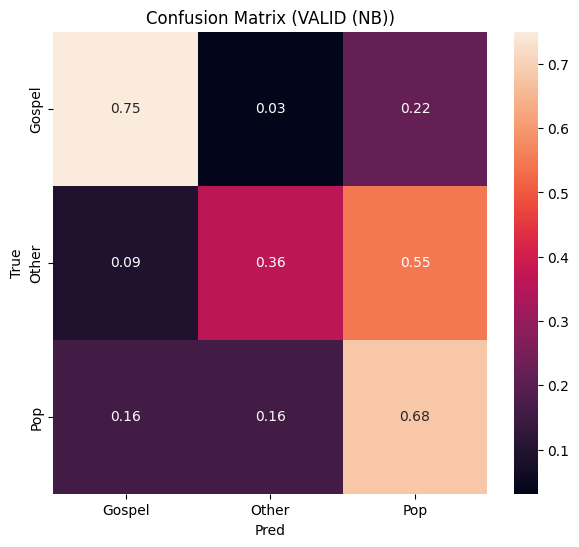


=== TEST (NB) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.7547169811320755
Macro-F1: 0.6523583082449477
              precision    recall  f1-score   support

      Gospel      0.771     0.844     0.806        32
       Other      0.364     0.333     0.348        12
         Pop      0.817     0.790     0.803        62

    accuracy                          0.755       106
   macro avg      0.651     0.656     0.652       106
weighted avg      0.752     0.755     0.753       106



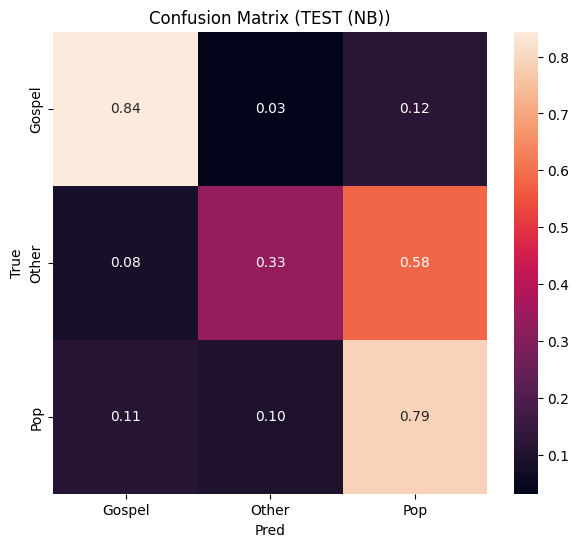


=== VALID (SVM) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.8113207547169812
Macro-F1: 0.713668878366125
              precision    recall  f1-score   support

      Gospel      0.862     0.781     0.820        32
       Other      0.667     0.364     0.471        11
         Pop      0.803     0.905     0.851        63

    accuracy                          0.811       106
   macro avg      0.777     0.683     0.714       106
weighted avg      0.807     0.811     0.802       106



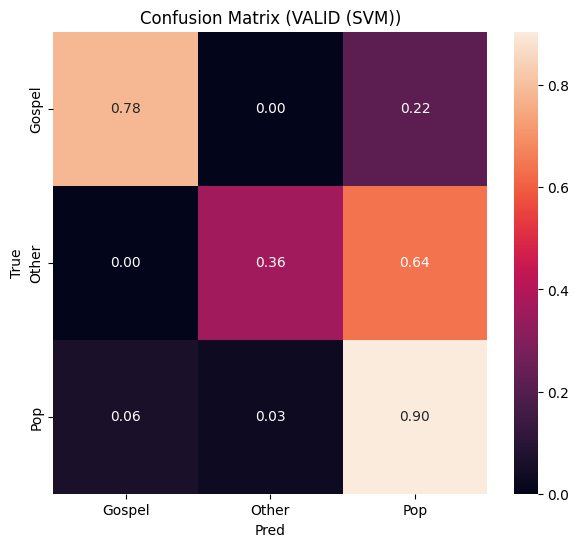


=== TEST (SVM) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.8018867924528302
Macro-F1: 0.6483690250293667
              precision    recall  f1-score   support

      Gospel      0.833     0.781     0.806        32
       Other      1.000     0.167     0.286        12
         Pop      0.784     0.935     0.853        62

    accuracy                          0.802       106
   macro avg      0.872     0.628     0.648       106
weighted avg      0.823     0.802     0.775       106



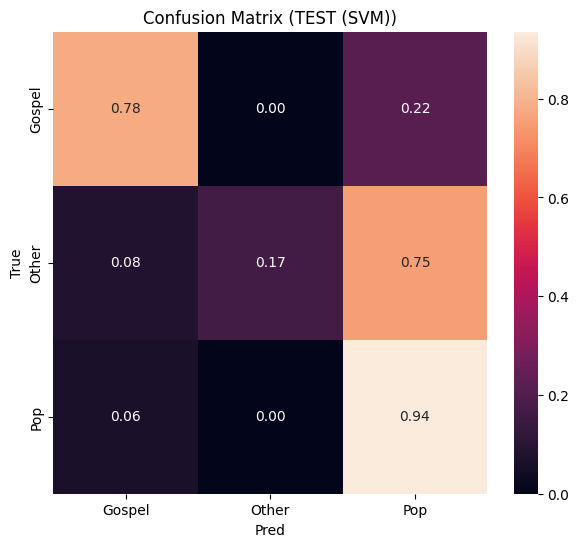

In [43]:
# === D) TRAIN & EVAL ===
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt, seaborn as sns

def eval_and_report(y_true, y_pred, split, le):
    import numpy as np
    present = np.unique(np.concatenate([y_true, y_pred]))
    names = le.inverse_transform(present)
    print(f"\n=== {split} ===")
    print("Included labels:", list(names))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Macro-F1:", f1_score(y_true, y_pred, average="macro"))
    print(classification_report(y_true, y_pred,
                                labels=present, target_names=names,
                                digits=3, zero_division=0))
    cm = confusion_matrix(y_true, y_pred, labels=present, normalize='true')
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=names, yticklabels=names)
    plt.title(f"Confusion Matrix ({split})"); plt.xlabel("Pred"); plt.ylabel("True")
    plt.show()

# NB (Counts + sample weights)
nb = MultinomialNB(alpha=1.0)
nb.fit(X_tr_nb, y_tr, sample_weight=nb_sample_weight)
pred_va_nb = nb.predict(X_va_nb)
pred_te_nb = nb.predict(X_te_nb)
eval_and_report(y_va, pred_va_nb, "VALID (NB)", le)
eval_and_report(y_te, pred_te_nb, "TEST (NB)",  le)

# SVM (TF-IDF + cap-boosted weights)
svm = LinearSVC(class_weight=svm_w, random_state=42)
svm.fit(X_tr_svm, y_tr)
pred_va_svm = svm.predict(X_va_svm)
pred_te_svm = svm.predict(X_te_svm)
eval_and_report(y_va, pred_va_svm, "VALID (SVM)", le)
eval_and_report(y_te, pred_te_svm, "TEST (SVM)",  le)


Shared bits for DL (reuse your splits/labels)

In [44]:
# Reuse: train_df, valid_df, test_df, text_plus, Label_PGO, and le (LabelEncoder) from ML
import numpy as np, pandas as pd
from sklearn.utils.class_weight import compute_class_weight

# Numeric labels (same order as ML)
y_tr_dl = le.transform(train_df["Label_PGO"])
y_va_dl = le.transform(valid_df["Label_PGO"])
y_te_dl = le.transform(test_df["Label_PGO"])

# Class weights (cost-sensitive)
classes = np.arange(len(le.classes_))
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_tr_dl)
cw_dict = {i: float(cw[i]) for i in classes}
print("DL class weights:", {le.classes_[i]: round(cw[i],2) for i in classes})

# Helper (re-use your ML report function if you want)
def show_report_dl(y_true, y_pred, split):
    # You already have eval_and_report(y_true, y_pred, split, le) from ML
    eval_and_report(y_true, y_pred, split + " (DL)", le)

DL class weights: {'Gospel': 1.09, 'Other': 3.14, 'Pop': 0.57}


Best VALID macro-F1=0.707 at tau_pop=0.53, tau_gospel=0.50

=== VALID (calibrated thresholds) ===
Accuracy: 0.7924528301886793
Macro-F1: 0.7066171304730945
              precision    recall  f1-score   support

      Gospel      0.833     0.781     0.806        32
       Other      0.500     0.455     0.476        11
         Pop      0.818     0.857     0.837        63

    accuracy                          0.792       106
   macro avg      0.717     0.698     0.707       106
weighted avg      0.790     0.792     0.790       106



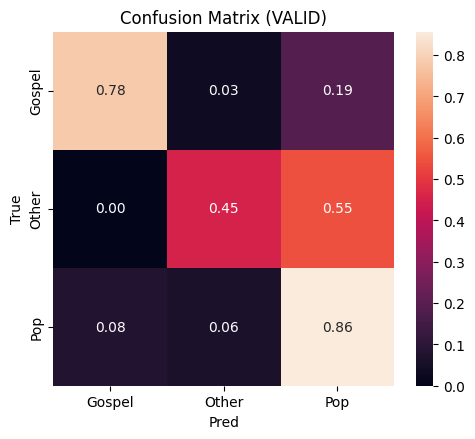


=== TEST (calibrated thresholds) ===
Accuracy: 0.8113207547169812
Macro-F1: 0.6750619718695646
              precision    recall  f1-score   support

      Gospel      0.862     0.781     0.820        32
       Other      0.500     0.250     0.333        12
         Pop      0.817     0.935     0.872        62

    accuracy                          0.811       106
   macro avg      0.726     0.656     0.675       106
weighted avg      0.795     0.811     0.795       106



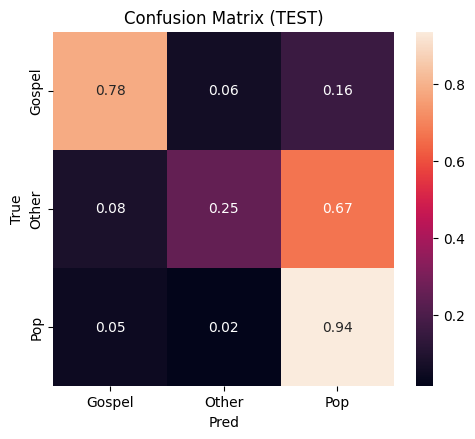

In [45]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score

# Calibrate SVM to get probabilities
svm_base = LinearSVC(class_weight=svm_w, random_state=42)
cal = CalibratedClassifierCV(svm_base, method="sigmoid", cv=5)
cal.fit(X_tr_svm, y_tr)

# Per-class thresholds tuned on VALID:
# If Pop prob >= tau_pop -> Pop
# elif Gospel prob >= tau_gospel -> Gospel
# else -> Other
classes = list(cal.classes_)
pop_idx     = classes.index(np.where(le.classes_ == "Pop")[0][0])       # indices in label-encoded space
gospel_idx  = classes.index(np.where(le.classes_ == "Gospel")[0][0])
other_idx   = classes.index(np.where(le.classes_ == "Other")[0][0])

def predict_with_thresholds(proba, tau_pop, tau_gospel):
    p = proba.copy()
    pred = np.full(len(p), other_idx, dtype=int)
    pop_mask    = p[:, pop_idx]    >= tau_pop
    gospel_mask = (p[:, gospel_idx] >= tau_gospel) & ~pop_mask
    pred[pop_mask]    = pop_idx
    pred[gospel_mask] = gospel_idx
    return pred

# --- tune on VALID ---
proba_va = cal.predict_proba(X_va_svm)
best = (0, 0.0, 0.0)  # (macroF1, tau_pop, tau_gospel)
for tp in np.arange(0.50, 0.76, 0.01):
    for tg in np.arange(0.50, 0.76, 0.01):
        pred = predict_with_thresholds(proba_va, tp, tg)
        f1 = f1_score(y_va, pred, average="macro")
        if f1 > best[0]:
            best = (f1, tp, tg)
print(f"Best VALID macro-F1={best[0]:.3f} at tau_pop={best[1]:.2f}, tau_gospel={best[2]:.2f}")

# --- evaluate on VALID and TEST with those thresholds ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def eval_probs(X, y, split, tp, tg):
    proba = cal.predict_proba(X)
    pred  = predict_with_thresholds(proba, tp, tg)
    labs  = sorted(list(set(y) | set(pred)))
    names = le.inverse_transform(labs)
    print(f"\n=== {split} (calibrated thresholds) ===")
    print("Accuracy:", accuracy_score(y, pred))
    print("Macro-F1:", f1_score(y, pred, average="macro"))
    print(classification_report(y, pred, labels=labs, target_names=names, digits=3, zero_division=0))
    cm = confusion_matrix(y, pred, labels=labs, normalize="true")
    plt.figure(figsize=(5.5,4.6))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=names, yticklabels=names)
    plt.title(f"Confusion Matrix ({split})"); plt.xlabel("Pred"); plt.ylabel("True")
    plt.show()

eval_probs(X_va_svm, y_va, "VALID", best[1], best[2])
eval_probs(X_te_svm, y_te, "TEST",  best[1], best[2])

In [46]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Reuse the same labels if you already have them; otherwise encode again:
try:
    y_tr, y_va, y_te  # already from ML
except NameError:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_tr = le.fit_transform(train_df["Label_PGO"])
    y_va = le.transform(valid_df["Label_PGO"])
    y_te = le.transform(test_df["Label_PGO"])

# Class weights (reuse if you already computed; else build now)
try:
    cw_dict  # from ML
except NameError:
    classes = np.arange(len(le.classes_))
    cw_arr  = compute_class_weight("balanced", classes=classes, y=y_tr)
    cw_dict = {i: float(cw_arr[i]) for i in classes}
    print("DL class weights:", {le.classes_[i]: round(cw_arr[i],2) for i in classes})


Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:970: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5726 - loss: 1.0863 - val_accuracy: 0.5849 - val_loss: 1.0457 - learning_rate: 0.0020
Epoch 2/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6364 - loss: 0.8101 - val_accuracy: 0.5849 - val_loss: 1.0106 - learning_rate: 0.0020
Epoch 3/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9020 - loss: 0.3097 - val_accuracy: 0.4245 - val_loss: 2.5864 - learning_rate: 0.0020
Epoch 4/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9799 - loss: 0.1646 - val_accuracy: 0.3774 - val_loss: 3.5873 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step

=== VALID (BiLSTM) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.5849056603773585
Macro-F1: 0.5180013769709997
              precision    recall  f1-score   support

      Gospel      0.639     0.719     0.676        32
       Other      0.200     0.364     0.258        11
         Pop      0.700     0.556     0.619 

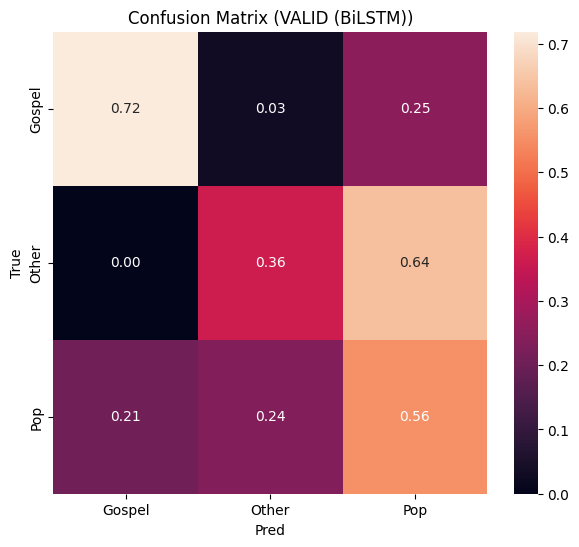


=== TEST (BiLSTM) ===
Included labels: ['Gospel', 'Other', 'Pop']
Accuracy: 0.7264150943396226
Macro-F1: 0.717015477015477
              precision    recall  f1-score   support

      Gospel      0.628     0.844     0.720        32
       Other      0.643     0.750     0.692        12
         Pop      0.837     0.661     0.739        62

    accuracy                          0.726       106
   macro avg      0.702     0.752     0.717       106
weighted avg      0.752     0.726     0.728       106



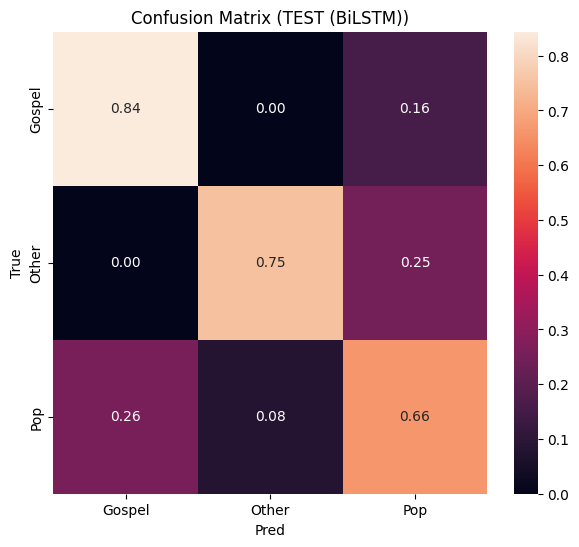

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks

# Tokenize -> pad (force int32)
MAX_WORDS = 60000
MAX_LEN   = 256

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text_plus"])

def to_seq(texts, max_len=MAX_LEN):
    return pad_sequences(tokenizer.texts_to_sequences(texts),
                         maxlen=max_len, padding="post", truncating="post", dtype="int32")

X_tr_bi = to_seq(train_df["text_plus"])
X_va_bi = to_seq(valid_df["text_plus"])
X_te_bi = to_seq(test_df["text_plus"])

num_words   = min(MAX_WORDS, len(tokenizer.word_index) + 1)
num_classes = len(le.classes_)

# Model
tf.keras.backend.clear_session()
EMB_DIM = 128; LSTM_UNITS = 128; DROPOUT = 0.3; LR = 2e-3

inp = layers.Input(shape=(MAX_LEN,), dtype="int32")
x = layers.Embedding(input_dim=num_words, output_dim=EMB_DIM, mask_zero=True)(inp)
x = layers.Bidirectional(layers.LSTM(LSTM_UNITS, return_sequences=True))(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(DROPOUT)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(DROPOUT)(x)
out = layers.Dense(num_classes, activation="softmax")(x)
bilstm = models.Model(inp, out)
bilstm.compile(optimizer=tf.keras.optimizers.Adam(LR),
               loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train
es = callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
rlrop = callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-5)

history = bilstm.fit(
    X_tr_bi, y_tr,
    validation_data=(X_va_bi, y_va),
    epochs=12, batch_size=64,
    class_weight=cw_dict,   # cost-sensitive
    callbacks=[es, rlrop],
    verbose=1
)

# Evaluate (reuses your ML eval function)
pred_va = bilstm.predict(X_va_bi, batch_size=256).argmax(1)
pred_te = bilstm.predict(X_te_bi, batch_size=256).argmax(1)
eval_and_report(y_va, pred_va, "VALID (BiLSTM)", le)
eval_and_report(y_te, pred_te, "TEST (BiLSTM)",  le)

In [49]:
import os, sys
os.environ["TRANSFORMERS_NO_TF"] = "1"     # don't import TF/Keras
os.environ["TRANSFORMERS_NO_FLAX"] = "1"   # don't import JAX/Flax

# If you accidentally imported transformers earlier in the notebook, reload it after setting flags:
if "transformers" in sys.modules:
    import importlib
    importlib.reload(sys.modules["transformers"])


In [50]:
# ---- put these lines at the very TOP of your XLM-R cell ----
import os, sys, importlib

# Tell Transformers to ignore TensorFlow & Flax entirely
os.environ["TRANSFORMERS_NO_TF"] = "1"
os.environ["USE_TF"] = "0"
os.environ["TRANSFORMERS_NO_FLAX"] = "1"
os.environ["USE_FLAX"] = "0"

# If transformers was already imported earlier in the notebook, purge it and reload
for m in list(sys.modules):
    if m.startswith("transformers"):
        del sys.modules[m]


In [51]:
from datasets import Dataset
from transformers import XLMRobertaTokenizerFast, XLMRobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch import nn


In [52]:
# Run this if you see KeyError: 'text_plus'
import re

def _pick(df, candidates):
    for cand in candidates:
        for c in df.columns:
            if cand.lower() == str(c).lower(): return c
    for cand in candidates:
        for c in df.columns:
            if cand.lower() in str(c).lower(): return c
    return None

def _ensure_text_plus(df_):
    text_col   = _pick(df_, ["Clean_Lyrics","clean_lyrics","lyric_text","Lyrics","lyric","Lyric"])
    title_col  = _pick(df_, ["song_title","Song Title","Title","SongTitle","သီချင်းခေါင်းစဉ်"])
    artist_col = _pick(df_, ["artist","Artist","singer","Singer","တေးဆို","တေးဆိုသူ"])
    assert text_col, f"No lyrics column found in: {list(df_.columns)}"
    def _join(r):
        parts = [str(r[text_col])]
        if title_col:  parts.append(str(r[title_col]))
        if artist_col: parts.append(str(r[artist_col]))
        return " ".join(p for p in parts if p and p.lower() != "nan").strip()
    df_["text_plus"] = df_.apply(_join, axis=1).astype(str)

for _name in ("train_df","valid_df","test_df"):
    _df = globals().get(_name, None)
    assert _df is not None, f"{_name} missing — run your ML split cell first."
    if "text_plus" not in _df.columns:
        _ensure_text_plus(_df); print(f"built text_plus for {_name}")



In [53]:
# Tell Transformers to ignore TF/Flax; silence W&B
import os, sys
os.environ["TRANSFORMERS_NO_TF"] = "1"; os.environ["USE_TF"] = "0"
os.environ["TRANSFORMERS_NO_FLAX"] = "1"; os.environ["USE_FLAX"] = "0"
os.environ["WANDB_DISABLED"] = "true"

# Install compatible versions
!pip -q install --no-cache-dir \
  "transformers==4.44.2" \
  "datasets==2.21.0" \
  "accelerate==0.34.2" \
  "tokenizers==0.19.1" \
  "huggingface-hub>=0.24.6" \
  "pyarrow==16.1.0"



In [ ]:
import numpy as np, torch
from datasets import Dataset
from transformers import XLMRobertaTokenizerFast, XLMRobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
from torch import nn
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Reuse labels/weights from ML if available; otherwise create them
try:
    le; _ = le.classes_
except NameError:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(train_df["Label_PGO"])

y_tr = le.transform(train_df["Label_PGO"])
y_va = le.transform(valid_df["Label_PGO"])
y_te = le.transform(test_df["Label_PGO"])

try:
    cw_dict
except NameError:
    from sklearn.utils.class_weight import compute_class_weight
    classes = np.arange(len(le.classes_))
    cw_arr = compute_class_weight("balanced", classes=classes, y=y_tr)
    cw_dict = {i: float(cw_arr[i]) for i in classes}

# Tokenizer + datasets
MODEL_NAME = "xlm-roberta-base"
tok = XLMRobertaTokenizerFast.from_pretrained(MODEL_NAME)
MAX_LEN = 256

def tok_map(batch):
    return tok(batch["text_plus"], truncation=True, padding="max_length", max_length=MAX_LEN)

def to_ds(df_):
    d = {"text_plus": df_["text_plus"].tolist(),
         "label": le.transform(df_["Label_PGO"]).tolist()}
    ds = Dataset.from_dict(d).map(tok_map, batched=True)
    keep = ["input_ids","attention_mask","label"]
    ds = ds.remove_columns([c for c in ds.column_names if c not in keep])
    ds.set_format(type="torch")
    return ds

ds_tr, ds_va, ds_te = to_ds(train_df), to_ds(valid_df), to_ds(test_df)

# Weighted loss inside Trainer
w_class = torch.tensor([cw_dict[i] for i in range(len(le.classes_))], dtype=torch.float)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = nn.CrossEntropyLoss(weight=w_class.to(logits.device))(logits, labels)
        return (loss, outputs) if return_outputs else loss

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {"accuracy": accuracy_score(labels, preds),
            "macro_f1": f1_score(labels, preds, average="macro")}

id2label = {i: name for i, name in enumerate(le.classes_)}
label2id = {v:k for k,v in id2label.items()}

model = XLMRobertaForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=len(le.classes_), id2label=id2label, label2id=label2id
)

args = TrainingArguments(
    output_dir="/content/xlmr_pgo",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    fp16=True,
    report_to="none",
    logging_dir="/content/xlmr_pgo/logs",
)

trainer = WeightedTrainer(
    model=model, args=args,
    train_dataset=ds_tr, eval_dataset=ds_va,
    compute_metrics=compute_metrics
)

trainer.train()

# Evaluate (uses your eval_and_report if present)
def _eval_and_report_fallback(y_true, y_pred, split):
    print(f"\n=== {split} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Macro-F1:", f1_score(y_true, y_pred, average="macro"))
    print(classification_report(y_true, y_pred, target_names=le.classes_, digits=3, zero_division=0))

def eval_hf(ds, y_true, split):
    out = trainer.predict(ds)
    preds = out.predictions.argmax(axis=1)
    try:
        eval_and_report(y_true, preds, split + " (XLM-R)", le)
    except NameError:
        _eval_and_report_fallback(y_true, preds, split + " (XLM-R)")

eval_hf(ds_va, y_va, "VALID")
eval_hf(ds_te, y_te, "TEST")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/847 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
